# 4 Flows on the Circle
---

**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)
    - [Example 4.2.1](#Example-4.2.1)
- [4.3 Nonuniform Oscillator](#4.3-Nonuniform-Oscillator)
    - [Example 4.3.1](#Example-4.3.1)
    - [Oscillation Period](#Oscillation-Period)
    - [Ghosts and Bottlenecks](#Ghosts-and-Bottlenecks)
    - [Example 4.3.2](#Example-4.3.2)
- [4.4 Overdamped Pendulum](#4.4-Overdamped-Pendulum)
- [4.5 Fireflies](#4.5-Fireflies)

---

In [21]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 4.0 Introduction
---

$$\dot{\theta} = f(\theta)$$

**vector field on the circle**


## 4.1 Examples and Definitions
---

### Example 4.1.1

$$\dot{\theta} = \sin\theta$$

*Solution:*



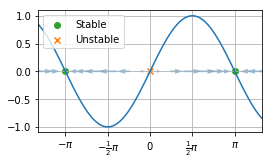

In [7]:
def theta_dot(theta):
    theta_ = np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi*3/2, pi*3/2, 100)
flow = np.linspace(-pi*3/2, pi*3/2, 20)

#ax = plt.subplot(111, projection='polar')
#ax.plot(theta, r)
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line

#ax.quiver(theta, 0, theta_dot(theta), 0)
#ax.grid(True)

plt.figure(figsize=(4, 2.25))
plt.plot(theta, theta_dot(theta))
plt.quiver(flow, 0, theta_dot(flow), 0, color=c[0], alpha=.5)
plt.scatter(np.array([-pi, pi]), np.array([0, 0]), c=c[2], marker=m[0], label='Stable')
plt.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')

plt.xlim(-pi-1, pi+1)
plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Example 4.1.2

$$\dot{\theta} = \theta$$

*Solution:*



## 4.2 Uniform Oscillator
---

$$\dot{\theta} = \omega$$

$$\theta(t) = \omega t + \theta_0$$

- $\omega$: angular freq
- $T$: period $T = \frac{2\pi}{\omega}$



### Example 4.2.1

- Speedy$T_1$ sec/track
- Pokey $T_2$ sec/track ($T_2 > T_1$)

*Solution:*

let 

- $\theta_1(t)$: Speedy position
- $\theta_2(t)$: Pokey position

$\dot{\theta_1} = \omega_1$
where $\omega_1 = \frac{2\pi}{T_1}$

def **phase difference**,  
$\phi := \theta_1 - \theta_2$

By subtraction,
$\dot{\phi} = \dot{\theta_1} - \dot{\theta_2} = \omega_1 - \omega_2$

$\phi$ increases by $2\pi$ after a time
$$\begin{align*}
T_{lap} &= \frac{2\pi}{\omega_1 - \omega_2} \\
&= \Big( \frac{1}{T_1} - \frac{1}{T_2} \Big) ^{-1}
\end{align*}$$


**beat phenomenon**

## 4.3 Nonuniform Oscillator
---

$$\begin{align*}
\dot{\theta} = \omega - a \sin \theta
& \quad\quad (4.3.1)
\end{align*}$$

- Electronics (phase-locked loops)
- Biology (oscillating neurons, firefly flashing, human sleep-wake cycle)
- Condensed-matter physics (Jasphson junction, charge-density waves)
- Mechanics (Overdamped pendulum driven by a constant torque)



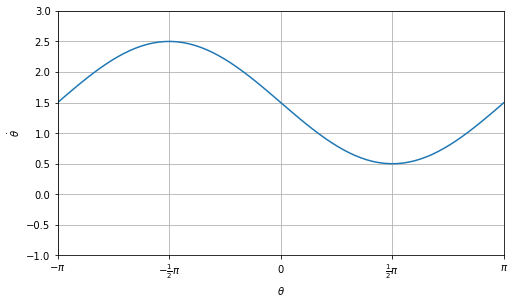

In [14]:
# constant
omega, a = 1.5, 1  

def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi-1, pi+1, 100)

plt.figure(figsize=(8, 4.5))

plt.plot(theta, theta_dot(theta, omega, a), c=c[0], linestyle=l[0])
plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
plt.xlim(-pi, pi)
plt.ylim(-1, 3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(True)
plt.show()

### Vector Fields

**bottle neck**


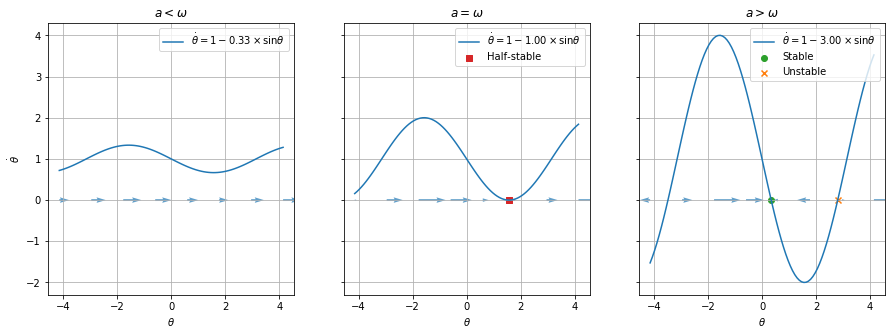

In [35]:
def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi-1, pi+1, 100)
flow = np.linspace(-pi-1, pi+1, 8)

omegas, aa = np.repeat(1, 3), np.array([1/3, 1, 3])
titles = np.array([r'$a < \omega$', r'$a = \omega$', r'$a > \omega$'])

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, omega, a, title in zip(axes, omegas, aa, titles):
    ax.plot(theta, theta_dot(theta, omega, a), c=c[0], linestyle=l[0], label=(r'$\dot{\theta} = 1 - %.2f \times \sin\theta$' % a))
    ax.quiver(flow, 0, theta_dot(flow, omega, a), 0, color=c[0], alpha=.7)
    
    if a == omega:
        ax.scatter(pi/2, theta_dot(pi/2, omega, a), c=c[3], marker=m[2], label='Half-stable')
    elif a > omega:
        ax.scatter(np.arcsin(omega/a), 0, c=c[2], marker=m[0], label='Stable')
        ax.scatter(pi-np.arcsin(omega/a), 0, c=c[1], marker=m[1], label='Unstable')
    
#     ax.xticks([-pi, -pi/2, 0, pi/2, pi], 
#            [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
    ax.set(xlabel=r'$\theta$', title=title)
    ax.legend(loc='best')
    ax.grid(True)
    
axes[0].set(ylabel=r'$\dot{\theta}$')
# plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
#            [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
# plt.xlim(-pi, pi)
# plt.ylim(-1, 3)
# plt.xlabel(r'$\theta$')
# plt.ylabel(r'$\dot{\theta}$')

plt.show()

### Example 4.3.1

linear stability analysis:

$$\begin{align*}
\dot{\theta} = \omega - a \sin \theta
& \quad\quad (4.3.1)
\end{align*}$$

*Solution:*

fixed points $\theta^*$ satisfy

$$\begin{cases}
\sin\theta^* = \frac{\omega}{a} \\ 
\cos\theta^* = \pm\sqrt{1 - \Big( \frac{\omega}{a} \Big)^2}
\end{cases}$$

linear stability is determined by

$$f'(\theta) = -a \cos\theta* = \mp a \sqrt{1 - \Big( \frac{\omega}{a} \Big)^2}$$

### Oscillation Period

$$\begin{align*}
T &= \int dt \\
&= \int_{0}^{2\pi} \frac{dt}{d\theta} d\theta \\
&= \int_{0}^{2\pi} \frac{d\theta}{\omega - a \sin\theta}
\end{align*}$$

replace $dt/d\theta$ for (4.3.1)

$$\begin{align*}
T = \frac{2\pi}{\sqrt{\omega^2 - a^2}}
& \quad\quad (4.3.2)
\end{align*}$$


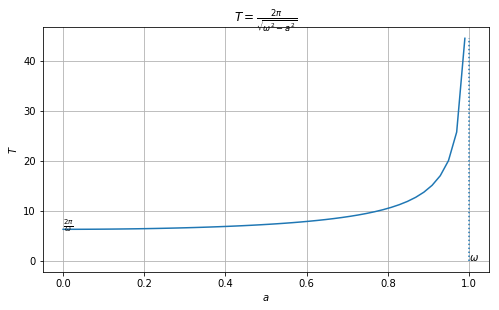

In [40]:
# constant
omega = 1
pi = np.pi

def f(a):
    T = 2*pi / np.sqrt(omega**2 - a**2)
    return T

a = np.linspace(0, omega-0.01)

plt.figure(figsize=(8, 4.5))

plt.plot(a, f(a), c=c[0], linestyle=l[0])
plt.plot(np.repeat(omega, 2), np.array([0, f(omega-0.01)]), c=c[0], linestyle=l[3])
plt.text(omega, 0, r'$\omega$')
plt.text(0, 2*pi/omega, r'$\frac{2\pi}{\omega}$')
plt.xlabel(r'$a$')
plt.ylabel(r'$T$')
plt.title(r'$T = \frac{2\pi}{\sqrt{\omega^2 - a^2}}$')
plt.grid(True)

plt.show()

estimate
$$\begin{align*}
\sqrt{\omega^2 - a^2}
&= \sqrt{\omega + a}\sqrt{\omega - a} \\
&\approx \sqrt{2\omega}\sqrt{\omega - a}
\end{align*}$$

$a \rightarrow \omega^-$

$$\begin{align*}
T &\approx \Big( \frac{\pi\sqrt{2}}{\sqrt{\pi}} \Big) \frac{1}{\sqrt{\omega - a}}
& \quad\quad (4.3.3)
\end{align*}$$




### Ghosts and Bottlenecks

**ghost**

consider

$\dot{\theta} = \omega - a\sin\theta$


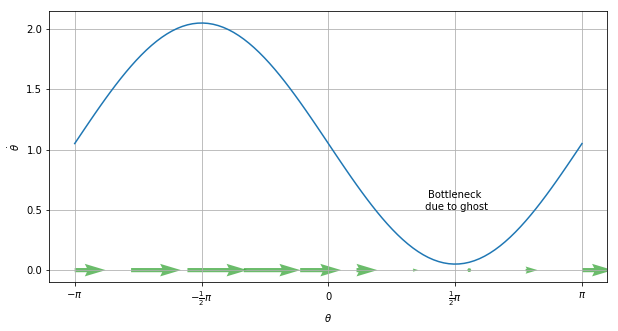

In [27]:
omega, a = 1.05, 1

def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi, pi, 100)
flow = np.linspace(-pi, pi, 10)

plt.figure(figsize=(10, 5))
plt.plot(theta, theta_dot(theta, omega, a), c=c[0], linestyle=l[0])
plt.quiver(flow, 0, theta_dot(flow, omega, a), 0, color=c[2], alpha=.7)

plt.text(pi/2, 0.5, 'Bottleneck\n due to ghost', horizontalalignment='center')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
plt.grid(True)
plt.show()

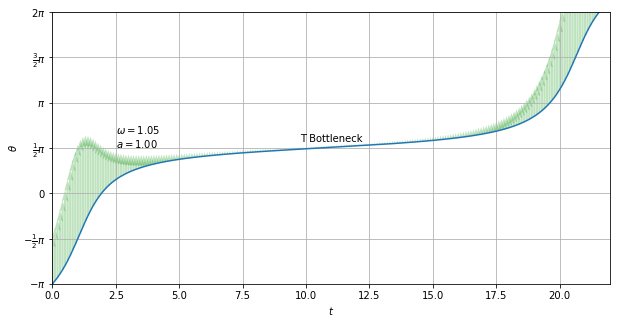

In [13]:
omega, a = 1.05, 1
pi = np.pi

def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

def slope(x_0, dt, iteration):
    x = np.array([x_0])
    t = np.array([0])
    
    for i in range(iteration):
        x_i = x[i]
        t_i = t[i]
        
        x_i = x_i + theta_dot(x_i, omega, a)*0.1
        t_i = t_i + dt
        
        x = np.append(x, np.array([x_i]))
        t = np.append(t, np.array([t_i]))
        
    return x, t

theta, t = slope(-pi, 0.1, 230)

plt.figure(figsize=(10, 5))
plt.plot(t, theta, c=c[0], linestyle=l[0])

plt.quiver(t, theta, 0, theta_dot(theta, omega, a), color=c[2], alpha=.3)

plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.xlim(0, 22)
plt.ylim(-pi, pi*2)
plt.yticks([-pi, -pi/2, 0, pi/2, pi, pi*3/2, pi*2],#, pi*5/2, pi*3], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$', r'$\frac{3}{2}\pi$', r'$2\pi$'])#, r'$\frac{5}{2}\pi$', r'$3\pi$'])
plt.text(11, pi/2+0.2, 'T Bottleneck', horizontalalignment='center')
plt.text(2.5, pi/2, r'$\omega = 1.05$' '\n' r'$a = 1.00$')
plt.grid(True)
plt.show()

$$\dot{x} = r + x^2$$

$$\begin{align*}
T_{bottleneck} &\approx \int_{-\infty}^{\infty} \frac{dx}{r + x^2} \\
&= \frac{\pi}{\sqrt{r}}
& \quad\quad (4.3.4)
\end{align*}$$

### Example 4.3.2

Estimate the period of 
$$\dot{\theta} = \omega - a\sin\theta$$

*Solution*:

Taylor expansion about $\theta = \frac{\pi}{2}$

Let $\phi = \theta - \frac{\pi}{2}$, where $\phi$ is small

$$\begin{align*}
\dot{\phi} 
&= \omega - a\sin(\phi+\frac{\pi}{2}) \\
&= \omega - a\cos\phi \\
&= \omega - a + \frac{1}{2}a\phi^2 + \cdots
\end{align*}$$

if we let 
$$\begin{align*}
x = \Big( \frac{a}{2} \Big)^{\frac{1}{2}} \phi, \quad r = \omega - a
\end{align*}$$

then $\Big( \frac{2}{a} \Big)^{\frac{1}{2}}\dot{x} \approx r + x^2$

$$\begin{align*}
T 
&\approx \Big( \frac{2}{a} \Big)^{\frac{1}{2}} \int_{-\infty}^{\infty} \frac{dx}{r + x^2} \\
&= \Big( \frac{2}{a} \Big)^{\frac{1}{2}} \frac{\pi}{\sqrt{r}}
\end{align*}$$

substitute $r = \omega - a$

$$\begin{align*}
T 
&\approx \Big( \frac{\pi\sqrt{2}}{\sqrt{\omega}} \Big) \frac{1}{\sqrt{\omega - a}}
\end{align*}$$

## 4.4 Overdamped Pendulum
---

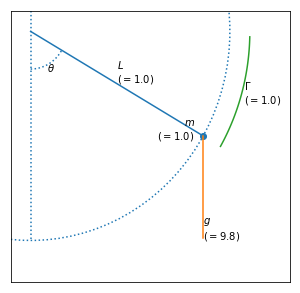

In [4]:
# constant
pi = np.pi
g = 9.8
Gamma, L, m = 1, 1, 1

def m_x(theta, L):
    x = np.sin(theta) * L
    return x
def m_y(theta, L):
    y = - np.cos(theta) * L
    return y

theta = pi/3

plt.figure(figsize=(5, 5))

th = np.linspace(-pi, pi, 100)
plt.plot(np.cos(th), np.sin(th), c=c[0], linestyle=l[3])
plt.plot(np.array([0, 0]), np.array([1, -1]), c=c[0], linestyle=l[3])


# m
plt.scatter(m_x(theta, L), m_y(theta, L))
plt.text(m_x(theta, L-.05), m_y(theta, L-.05), (r'$m$' '\n' r'$(=%.1f)$' % m), horizontalalignment='right', verticalalignment='center')

# L
plt.plot(np.array([0, m_x(theta, L)]), np.array([0, m_y(theta, L)]), c=c[0], linestyle=l[0])
plt.text(m_x(theta, L)/2, m_y(theta, L)/2, (r'$L$' '\n' r'$(= %.1f$)' % L))

# theta
plt.plot(np.sin(np.linspace(0, theta))*.18, -np.cos(np.linspace(0, theta))*.18, c=c[0], linestyle=l[3])
plt.text(np.sin(theta/2)/5, -np.cos(theta/2)/5, r'$\theta$', horizontalalignment='center', verticalalignment='center')

# g
plt.plot(np.array([m_x(theta, L), m_x(theta, L)]), 
         np.array([m_y(theta, L), m_y(theta, L) - g/20]), c=c[1], linestyle=l[0])
plt.text(m_x(theta, L), m_y(theta, L) - g/20, (r'$g$' '\n' r'$(= %.1f)$' % g))

# Gamma
plt.text(m_x(theta+Gamma/2/2, L+.11), m_y(theta+Gamma/2/2, L+.11), (r'$\Gamma$' '\n' r'$(= %.1f$)' % Gamma), horizontalalignment='left', verticalalignment='center')
Gamma = np.linspace(theta, theta+Gamma/2, 100)
plt.plot(m_x(Gamma, L+.1), m_y(Gamma, L+.1), c=c[2], linestyle=l[0])

plt.xlim(-0.1, 1.3)
plt.ylim(-1.2, 0.1)
plt.xticks([])
plt.yticks([])
plt.grid(True, linestyle=l[3])

plt.show()

$$\begin{align*}
mL^2\ddot{\theta} + b\dot{\theta} + mgL\sin\theta = \Gamma
& \quad\quad (4.4.1)
\end{align*}$$

- $m$: mass
- $L$: length
- $b$: viscous damping constant
- $g$: gravity
- $\Gamma$: torque ($\Gamma>0$)

inertia term: $mL^2\ddot{\theta} <<0$

$$\begin{align*}
b\dot{\theta} + mgL\sin\theta = \Gamma
& \quad\quad (4.4.2)
\end{align*}$$

$\times 1/mgL$

$$\begin{align*}
\frac{b}{mgL}\dot{\theta} = \frac{\Gamma}{mgL} -\sin\theta
\end{align*}$$

let 

$$\begin{align*}
\tau := \frac{mgL}{b} t, \quad
\gamma := \frac{\Gamma}{mgL}
& \quad\quad (4.4.3)
\end{align*}$$

then, 
$$\begin{align*}
\theta' = \gamma - \sin\theta
& \quad\quad (4.4.4)
\end{align*}$$
where $\theta' = d\theta/dt$

$\gamma$: ratio of applied torque to the maximum gravitational torque

if $\gamma > 1$
never be balanced by gravitaion


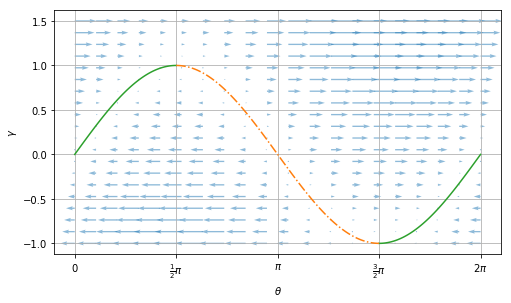

In [4]:
def theta_dot(theta, gamma):
    theta_ = gamma - np.sin(theta)
    return theta_

pi = np.pi
# gammas = np.array([.5, 1, 1.5])
gamma_flow = np.linspace(-1, 1.5, 20)
theta_flow = np.linspace(0, pi*2, 20)
theta_flow, gamma_flow = np.meshgrid(theta_flow, gamma_flow)

plt.figure(figsize=(8, 4.5))

plt.quiver(theta_flow, gamma_flow, theta_dot(theta_flow, gamma_flow), 0, color=c[0], alpha=.5)

# fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))
# for ax, gamma in zip(axes, gammas):
#     ax.plot(theta, theta_dot(theta, gamma))
#     ax.quiver()
#     ax.set(xlabel=r'$\theta$', ylabel=r'$\dot{\theta}$')
#     ax.grid(True)

theta = np.linspace(0, pi/2, 100)
plt.plot(theta, -theta_dot(theta, 0), c=c[2], linestyle=l[0])
plt.plot(theta+pi*3/2, -theta_dot(theta+pi*3/2, 0), c=c[2], linestyle=l[0])
theta = np.linspace(0, pi, 100)
plt.plot(theta+pi/2, -theta_dot(theta+pi/2, 0), c=c[1], linestyle=l[2])

plt.xticks([0, pi/2, pi, pi*3/2, pi*2], 
           [r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$', r'$\frac{3}{2}\pi$', r'$2\pi$'])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\gamma$')
plt.grid(True)
plt.show()

## 4.5 Fireflies
---

### Model

$$\begin{align*}
\dot{\Theta} = \Omega
& \quad\quad (4.5.1)
\end{align*}$$


$$\begin{align*}
\dot{\theta} = \omega + A\sin(\Theta - \theta)
& \quad\quad (4.5.2)
\end{align*}$$

**Resetting strength**




### Analysis

phase difference
$\phi = \Theta - \theta$

subtracting (4.5.2) from (4.5.1)
$$\begin{align*}
\dot{\phi} 
&= \dot{\Theta} - \dot{\theta} \\
&= \Omega - \omega - A\sin\phi
& \quad\quad (4.5.3)
\end{align*}$$

nondimensionalized
$$\begin{align*}
\tau := At, \quad \mu := \frac{\Omega - \omega}{A}
& \quad\quad (4.5.4)
\end{align*}$$

Then
$$\begin{align*}
\phi' = \mu - \sin\phi
& \quad\quad (4.5.5)
\end{align*}$$

where $\phi' = \frac{d\phi}{d\tau}$



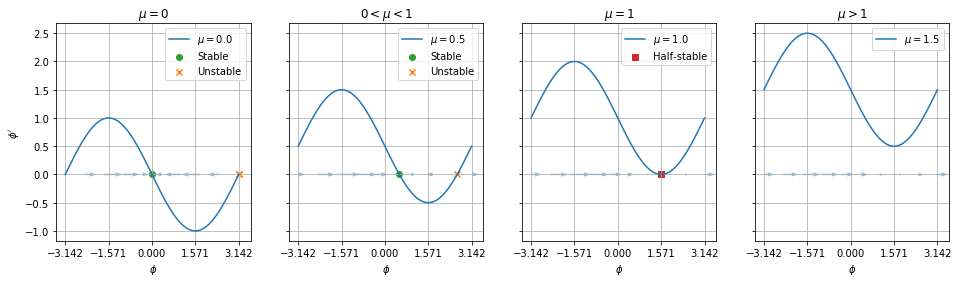

In [32]:
# mu = 
pi = np.pi

def phi_prime(phi, mu):
    phi_ = mu - np.sin(phi)
    return phi_

phi = np.linspace(-pi, pi, 100)
flow = np.linspace(-pi, pi, 10)

mus = np.array([0, .5, 1, 1.5])
titles = np.array([r'$\mu=0$', r'$0<\mu<1$', r'$\mu=1$', r'$\mu>1$'])

fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(16, 4))

for ax, mu, title in zip(axes, mus, titles):
    ax.plot(phi, phi_prime(phi, mu), c=c[0], linestyle=l[0], label=(r'$\mu = %.1f$' % mu))
    ax.quiver(flow, 0, phi_prime(flow, mu), 0, color=c[0], alpha=.5)
    ax.set(title=title, xlabel=r'$\phi$')
    
    if mu == 0:
        ax.scatter(0, phi_prime(0, mu), c=c[2], marker=m[0], label='Stable')
        ax.scatter(pi, phi_prime(pi, mu), c=c[1], marker=m[1], label='Unstable')
        ax.scatter(pi, phi_prime(pi, mu), c=c[1], marker=m[1])
    elif (mu > 0) & (mu < 1):
        ax.scatter(np.arcsin(mu), 0, c=c[2], marker=m[0], label='Stable')
        ax.scatter(pi - np.arcsin(mu), 0, c=c[1], marker=m[1], label='Unstable')
    elif mu == 1:
        ax.scatter(pi/2, 0, c=c[3], marker=m[2], label='Half-stable')
    
    ax.set_xticks(np.arange(-pi, pi+.1, pi/2))#, [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
    ax.legend(loc='best')
    ax.grid(True)

axes[0].set(ylabel=r"$\phi'$")

plt.show()

$-1 \le \frac{\Omega - \omega}{A} \le 1$

$$\omega-A \ge \Omega \ge \omega+A$$


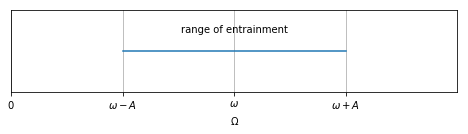

In [46]:
omega, A = 2, 1

plt.figure(figsize=(8, 1.5))

plt.plot(np.array([omega-A, omega+A]), np.array([0, 0]))
plt.text(omega, 0.025, 'range of entrainment', horizontalalignment='center')

plt.xticks([0, omega-A, omega, omega+A], 
           [r'$0$', r'$\omega-A$', r'$\omega$', r'$\omega+A$'])
plt.yticks([])
plt.xlim(0, 4)
plt.xlabel(r'$\Omega$')
plt.grid(True)
plt.show()

$$\begin{align*}
\sin\phi^* = \frac{\Omega - \omega}{A}
& \quad\quad (4.5.6)
\end{align*}$$


$$\begin{align*}
T_{\text{drift}} 
&= \int dt = \int_0^{2\pi} \frac{dt}{d\phi} d\phi \\
&= \int_0^{2\pi} \frac{d\phi}{\Omega - \omega - A\sin\phi}
\end{align*}$$

invoke (4.3.2)
$$\begin{align*}
T_{\text{drift}} = \frac{2\pi}{\sqrt{(\Omega - \omega)^2 - A^2}}
& \quad\quad (4.5.7)
\end{align*}$$

---
**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)
    - [Example 4.2.1](#Example-4.2.1)
- [4.3 Nonuniform Oscillator](#4.3-Nonuniform-Oscillator)
    - [Example 4.3.1](#Example-4.3.1)
    - [Oscillation Period](#Oscillation-Period)
    - [Ghosts and Bottlenecks](#Ghosts-and-Bottlenecks)
    - [Example 4.3.2](#Example-4.3.2)
- [4.4 Overdamped Pendulum](#4.4-Overdamped-Pendulum)
- [4.5 Fireflies](#4.5-Fireflies)
    - [Model](#Model)